<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-130/blob/main/Actividad_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad Semana 4: Ciencia y Análisis de Datos

##Nombre: Francisco Javier Ramírez Arias 
##Matricula: A01316379
##Nombre: Jesús Angel Rincón Ruiz
##Matricula: A01793960

In [ ]:
#Se cargan diferentes librerias para llevar a cabo el análisis de datos.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


Parte 1: Ejercicio Guiado
* Determine el número de mínimo de componente principales que representa la mayor parte de la variación en sus datos
 * Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.
* Interprete cada componente principal en términos de las variables originales
 * Examine la magnitud y la direccion de los coeficientes de las variables originales.
* Identifique valores atípicos
  * Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

In [ ]:
path = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

In [ ]:
df = pd.read_csv(path, index_col = 0)
df.index.name = None #Eliminamos la columna Index ya que nuestro dataframe ya cuenta con su columna ID
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [ ]:
#Iniciamos con la limpieza de datos
#continuamos con la estrategia de limpieza de datos utilizada en la Actividad 3 en la cual se utilizo este mismo D

In [ ]:
#Copia de la base de datos
drop = ['Y']
#ndf
#ndf.drop(columns = drop, inplace = True)

ndf = df.copy()

ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [ ]:
#Llenamos cada columna de la base de datos con la estrategia seleccionada (mean)

In [ ]:
#confirmamos que no tenemos datos faltantes
ndf.isna().any()

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

# **Normalización de los datos**

In [ ]:
#eliminamos las columnas categoricas como lo son (X2: Gender, X3: Education, X4: Marital status, X6 - X11: History of past payment)

In [ ]:
ndf.columns
ndf.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
#se calcula correlación
ndf.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
X1,1.000000,0.024744,-0.219115,-0.108193,0.144684,-0.271265,-0.296461,-0.286249,-0.267390,-0.249485,...,0.294063,0.295614,0.290475,0.195307,0.178431,0.210143,0.203256,0.217177,0.219585,-0.153506
X2,0.024744,1.000000,0.014353,-0.031479,-0.090860,-0.057720,-0.070862,-0.065949,-0.060055,-0.055002,...,-0.022029,-0.017169,-0.016893,-0.000179,-0.001427,-0.008581,-0.002267,-0.001688,-0.002781,-0.039919
X3,-0.219115,0.014353,1.000000,-0.143377,0.175043,0.105386,0.121587,0.114089,0.108867,0.097542,...,-0.000427,-0.007545,-0.009108,-0.037466,-0.030024,-0.039945,-0.038274,-0.040338,-0.037181,0.028136
X4,-0.108193,-0.031479,-0.143377,1.000000,-0.414227,0.019913,0.024218,0.032543,0.033002,0.035529,...,-0.023399,-0.025465,-0.021311,-0.005913,-0.008130,-0.003515,-0.012651,-0.001205,-0.006676,-0.024318
X5,0.144684,-0.090860,0.175043,-0.414227,1.000000,-0.039442,-0.050166,-0.053055,-0.049730,-0.053761,...,0.051443,0.049401,0.047706,0.025978,0.021794,0.029223,0.021357,0.022790,0.019514,0.013840
X6,-0.271265,-0.057720,0.105386,0.019913,-0.039442,1.000000,0.672145,0.574468,0.538867,0.509370,...,0.179156,0.180697,0.177062,-0.079246,-0.070112,-0.070467,-0.063968,-0.058145,-0.058668,0.324753
X7,-0.296461,-0.070862,0.121587,0.024218,-0.050166,0.672145,1.000000,0.766770,0.662109,0.622841,...,0.222257,0.221375,0.219377,-0.080697,-0.059002,-0.055825,-0.046856,-0.037037,-0.036498,0.263570
X8,-0.286249,-0.065949,0.114089,0.032543,-0.053055,0.574468,0.766770,1.000000,0.777115,0.686481,...,0.227494,0.225465,0.222537,0.001225,-0.066787,-0.053270,-0.046003,-0.035781,-0.035836,0.235573
X9,-0.267390,-0.060055,0.108867,0.033002,-0.049730,0.538867,0.662109,0.777115,1.000000,0.820038,...,0.246054,0.243007,0.239195,-0.009326,-0.001923,-0.069180,-0.043427,-0.033596,-0.026531,0.216488
X10,-0.249485,-0.055002,0.097542,0.035529,-0.053761,0.509370,0.622841,0.686481,0.820038,1.000000,...,0.271882,0.269708,0.262375,-0.006066,-0.003185,0.009039,-0.058253,-0.033320,-0.022992,0.203996


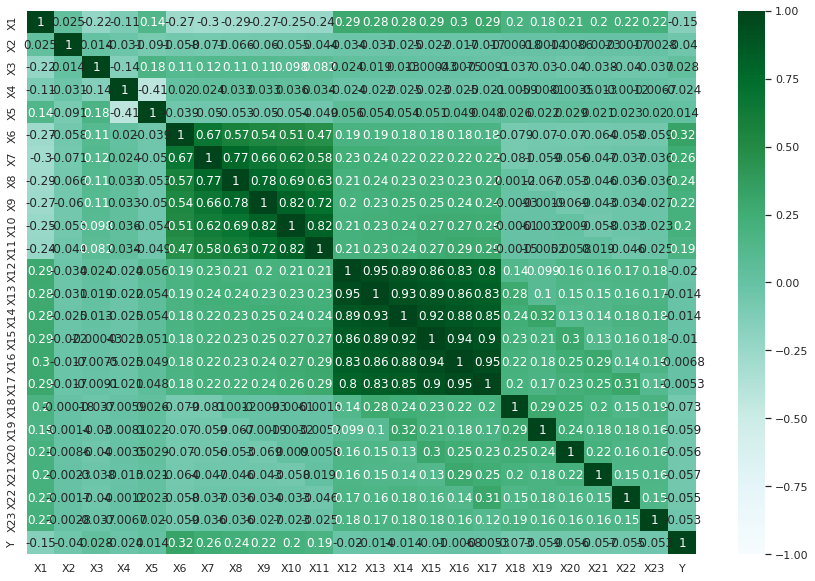

In [ ]:
corrs = ndf.corr()

sns.set(rc = {"figure.figsize": (15,10)})
sns.heatmap(corrs, vmin = -1, vmax =1, cmap = "BuGn", annot = True)

**Normalización Min - Max**
scaler = StandardScaler()
scaled = scaler.fit_transform(ndf)

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(ndf)
scaled

array([[-1.13672015,  0.81012666,  0.18593186, ..., -0.3141435 ,
        -0.29340185,  1.87643941],
       [-0.3659805 ,  0.81012666,  0.18593186, ..., -0.3141435 ,
        -0.18090675,  1.87643941],
       [-0.59720239,  0.81012666,  0.18593186, ..., -0.24870099,
        -0.01216409, -0.53292421],
       ...,
       [-1.05964618, -1.23437488,  0.18593186, ..., -0.18325848,
        -0.11903444,  1.87643941],
       [-0.67427636, -1.23437488,  1.45126397, ...,  3.15195364,
        -0.19193127,  1.87643941],
       [-0.90549825, -1.23437488,  0.18593186, ..., -0.24870099,
        -0.2371543 ,  1.87643941]])

In [ ]:
scaled[:5]

array([[-1.13672015,  0.81012666,  0.18593186, -1.05736968, -1.24586411,
         1.7944621 ,  1.78218212, -0.6969691 , -0.66647708, -1.52977346,
        -1.48582085, -0.64260318, -0.64747557, -0.66805862, -0.67256256,
        -0.66313396, -0.65280267, -0.34188504, -0.22711057, -0.29677335,
        -0.30808663, -0.3141435 , -0.29340185,  1.87643941],
       [-0.3659805 ,  0.81012666,  0.18593186,  0.85849017, -1.02889425,
        -0.87502757,  1.78218212,  0.13913178,  0.18885751,  0.23501925,
         1.99209367, -0.65931873, -0.6668203 , -0.63932436, -0.62171122,
        -0.60631669, -0.59805145, -0.34188504, -0.21361453, -0.2399814 ,
        -0.24426427, -0.3141435 , -0.18090675,  1.87643941],
       [-0.59720239,  0.81012666,  0.18593186,  0.85849017, -0.16101485,
         0.01480232,  0.11166485,  0.13913178,  0.18885751,  0.23501925,
         0.25313641, -0.29870547, -0.49399619, -0.4825042 , -0.4498393 ,
        -0.41731497, -0.3917396 , -0.2502399 , -0.19191671, -0.2399814 ,
  

In [ ]:
scaled_df = pd.DataFrame(scaled, columns=ndf.columns)
scaled_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,-1.136720,0.810127,0.185932,-1.05737,-1.245864,1.794462,1.782182,-0.696969,-0.666477,-1.529773,...,-0.672563,-0.663134,-0.652803,-0.341885,-0.227111,-0.296773,-0.308087,-0.314144,-0.293402,1.876439
1,-0.365981,0.810127,0.185932,0.85849,-1.028894,-0.875028,1.782182,0.139132,0.188858,0.235019,...,-0.621711,-0.606317,-0.598051,-0.341885,-0.213615,-0.239981,-0.244264,-0.314144,-0.180907,1.876439
2,-0.597202,0.810127,0.185932,0.85849,-0.161015,0.014802,0.111665,0.139132,0.188858,0.235019,...,-0.449839,-0.417315,-0.391740,-0.250240,-0.191917,-0.239981,-0.244264,-0.248701,-0.012164,-0.532924
3,-0.905498,0.810127,0.185932,-1.05737,0.164440,0.014802,0.111665,0.139132,0.188858,0.235019,...,-0.232524,-0.186905,-0.156717,-0.221140,-0.169394,-0.228623,-0.237882,-0.244185,-0.237154,-0.532924
4,-0.905498,-1.234375,0.185932,-1.05737,2.334138,-0.875028,0.111665,-0.696969,0.188858,0.235019,...,-0.347126,-0.348279,-0.331599,-0.221140,1.334785,0.271146,0.266315,-0.269054,-0.255210,-0.532924


In [ ]:
cols = ["X1", "X2", "X3"]
summary = {
"Varianzas": scaled_df[cols].var()[0:3],
"Valor Min": scaled_df[cols].min()[0:3],
"Valor Max": scaled_df[cols].max()[0:3]
}
pd.DataFrame(summary, index = cols).transpose()


,X1,X2,X3
Varianzas,1.000033,1.000033,1.000033
Valor Min,-1.213794,-1.234375,-2.344732
Valor Max,6.416528,0.810127,5.247260


**Principal component**

In [ ]:
pcs =PCA()
pcs_t = pcs.fit_transform(scaled_df.dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)*100
                             })
#pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,Standard deviation,Proportion of variance,Cumulative proportion
0,2.560195,0.273052,27.305248
1,2.049440,0.174973,44.802529
2,1.246291,0.064705,51.273044
3,1.214560,0.061452,57.418274
4,1.020219,0.043360,61.754246
5,0.986976,0.040580,65.812252
6,0.956869,0.038142,69.626466
7,0.952825,0.037820,73.408509
8,0.941889,0.036957,77.104231
9,0.933875,0.036331,80.737334


In [ ]:
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df

,Standard deviation,Proportion of variance,Cumulative proportion
PC1,2.560195,0.273052,27.305248
PC2,2.049440,0.174973,44.802529
PC3,1.246291,0.064705,51.273044
PC4,1.214560,0.061452,57.418274
PC5,1.020219,0.043360,61.754246
PC6,0.986976,0.040580,65.812252
PC7,0.956869,0.038142,69.626466
PC8,0.952825,0.037820,73.408509
PC9,0.941889,0.036957,77.104231
PC10,0.933875,0.036331,80.737334


In [ ]:
pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)
print("Varianza total variables originales: ", scaled_df.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total variables originales:  24.000800244539896
Varianza total de los componentes:  24.004908649630764


In [ ]:
pcsSummary_df


,Standard deviation,Proportion of variance,Cumulative proportion
PC1,2.560195,0.273052,27.305248
PC2,2.049440,0.174973,44.802529
PC3,1.246291,0.064705,51.273044
PC4,1.214560,0.061452,57.418274
PC5,1.020219,0.043360,61.754246
PC6,0.986976,0.040580,65.812252
PC7,0.956869,0.038142,69.626466
PC8,0.952825,0.037820,73.408509
PC9,0.941889,0.036957,77.104231
PC10,0.933875,0.036331,80.737334


In [ ]:
total_var =scaled_df.var().sum()
pd.DataFrame({
"Porcentaje Varianza": (scaled_df.var()/ total_var) * 100,
"Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / total_var) *100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
X1,4.166667,4.166667
X2,4.166667,8.333333
X3,4.166667,12.500000
X4,4.166667,16.666667
X5,4.166667,20.833333
X6,4.166667,25.000000
X7,4.166667,29.166666
X8,4.166667,33.333333
X9,4.166667,37.500000
X10,4.166667,41.666667


In [ ]:
comps_df = pd.DataFrame(pcs.components_.round(4), columns = pcs_df.columns, index = scaled_df.columns) 
comps_df.iloc[:,:11]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
X1,0.0659,-0.0219,0.0198,-0.0056,0.0140,0.1644,0.1970,0.2030,0.2095,0.2132,0.2084
X2,0.3116,0.0305,-0.0886,-0.0394,0.0627,-0.2971,-0.3283,-0.3352,-0.3345,-0.3212,-0.2958
X3,0.0106,0.0272,-0.3156,0.4636,-0.4732,-0.0202,0.0194,0.0648,0.0928,0.1128,0.1149
X4,0.0762,-0.0796,0.2304,-0.4336,0.4515,0.0209,0.0480,0.0793,0.1026,0.1086,0.1033
X5,-0.1992,0.7375,0.4526,-0.0258,-0.1398,-0.1114,-0.0520,-0.0026,0.0371,0.0546,0.0631
X6,-0.2667,-0.6270,0.3896,0.2321,0.0049,-0.1332,-0.0612,-0.0167,0.0057,0.0166,0.0090
X7,-0.2600,0.0085,0.4044,0.1884,-0.1394,0.2177,0.0420,-0.0901,-0.1961,-0.2340,-0.2323
X8,0.0491,0.0762,-0.3209,-0.1228,0.0497,-0.0265,-0.0800,-0.0443,-0.0119,0.0448,0.0836
X9,-0.0258,-0.0489,0.0538,0.0103,0.0079,-0.0371,0.0052,-0.0070,-0.0133,0.0148,0.0942
X10,0.0237,0.0185,-0.1575,-0.0574,0.0479,-0.0330,-0.0337,-0.0105,0.0464,0.0568,0.0016


In [ ]:
comps_df.iloc[:,:11].abs().idxmax()


PC1     X15
PC2      X5
PC3      X5
PC4     X14
PC5     X14
PC6     X16
PC7     X17
PC8     X19
PC9     X17
PC10    X20
PC11    X17
dtype: object

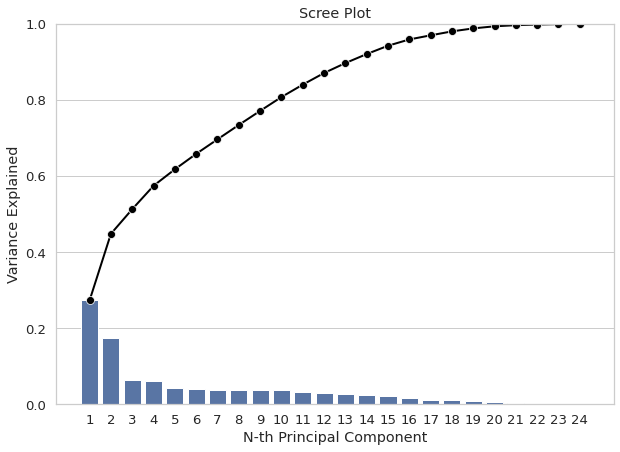

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

#Parte 2: Responda las siguientes preguntas



1.   ¿Cuál es el número de componentes mínimo y porqué? **Para nuestro caso en particular, considero que el número de componentes principales mínimo se encontraría entre 10 y 11. Porque estos presentan aproximadamente entre el 83 y 86 porcientos de la variación de información del conjunto de los datos.**  

2.   ¿Cuál es la variación de los datos que representan esos componentes? **La variación de estos componentes principales representa entre el 83 y 86 % de los datos.**

3.   ¿Cuál es la pérdida de información después de realizar PCA? **Debido a la selección entre 10 y 11 componentes principales, la pérdida de información se encuentra en el 17 y 14 porciento, la cual no se utilizaría para el entrenamiento de algún modelo de aprendizaje máquina.**

4.    De las variables originales, ¿Cuál tienen mayor y cuál menor importancia en los componentes principales? **De los componentes principales seleccionados entre 10 y 11, la variable que tiene mayor importancia es la X15 que indica el estado de cuenta del cliente entre tres o cuatro meses anteriores, al estado de cuenta actual. La que tiene menor importancia es la X17 que hace referencia al estado de cuenta de los últimos seis meses**

5. ¿Cuándo se recomienda realizar un PCA y que beneficios ofrece para Machine Learning? **El análisis de componentes principales se recomienda utilizar para obtener relaciones entre variables y relaciones entre muestras, permite detectar valores atípicos, permite encontrar patrones y cuantificarlos, así como generar nuevas hipótesis. El análisis de componentes principales es comúnmente realizado dentro de la etapa de preprocesamiento, lo que permite obtener un conjunto de datos más compacto. Es común utilizar estos componentes en la validación cruzada dentro del entrenamiento de un modelo de clasificación. Sin embargo el uso de este enfoque en clasificación es cuestionable en ocasiones. Por ejemplo, la validación cruzada nos menciona que algunos compontes son válidos, pero resulta que otros componentes permiten mejorar la clasificación. Esto debido a que cierta información es retenida por el análisis de componentes principales. Sin embargo el uso PCA dentro de clasificación nos permite mejorar los tiempos de entrenamiento de los algoritmos de machine learning.**